In [1]:
 pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing packages
import sys
import os
import cv2 
import pydot
import graphviz
import numpy as np
import tensorflow as tf
import random as rn
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from tensorflow.keras.models import save_model
from random import shuffle
from sklearn.metrics import confusion_matrix

In [3]:
#checking and changing curent working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
 
current_path()
 
os.chdir('C:/Users/aaron/Downloads/archive/Dataset')
 
current_path()

Current working directory before
C:\Users\aaron\Downloads

Current working directory before
C:\Users\aaron\Downloads\archive\Dataset



In [4]:
#sub directories
directories = [d for d in os.listdir("C:/Users/aaron/Downloads/archive/Dataset") if os.path.isdir(os.path.join("C:/Users/aaron/Downloads/archive/Dataset", d))]
directories

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [5]:
labels = []
images = []

category = 0 
for d in directories:
    label_dir = os.path.join("C:/Users/aaron/Downloads/archive/Dataset", d)
    file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".jpg")]
    
 
    counter = 0
    for f in file_names:
        img = cv2.imread(f)
        imresize = cv2.resize(img, (128, 128))
        
        images.append(imresize)
        labels.append(category)

        counter += 1
            
    category += 1 

In [6]:
#images, shape and RBG
images = np.array(images)
images.shape

(6392, 128, 128, 3)

In [7]:
labels = np.array(labels)
labels.shape

(6392,)

In [8]:
#splitting data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1234)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5113, 128, 128, 3)
(5113,)
(1279, 128, 128, 3)
(1279,)


In [9]:
# normalize inputs from [0.0, 255.0] for input in the range [0.0, 1.0]
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)

(5113, 4)


In [10]:
num_classes = y_train.shape[1]
print(num_classes)

4


In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

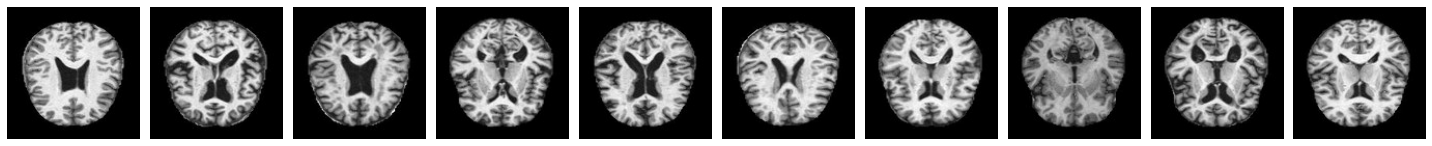

In [12]:

plotImages(X_train[:10])

In [13]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

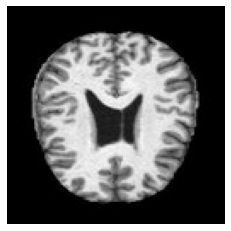

In [14]:
plt.axis('off')
plt.imshow(X_train[0])

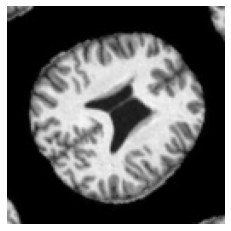

In [15]:
#testing data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X_train)[0])

In [16]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("My_trained_model.h5",
                                                     save_best_only=True,
                                                     monitor='val_loss',
                                                      verbose=1)

In [17]:
#Sequential model
model = Sequential()
data_augmentation,
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_regularizer='l2'))#number of neurons
model.add(Dense(num_classes, activation='softmax'))

In [18]:
#Compile
epochs = 25 
lr = 0.01 
shuffle = True
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 96)      

In [19]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [20]:
# Model evaluation
seed = 1234
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[model_checkpoint])
    
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
80/80 [==============================] - ETA: 0s - loss: 2.4650 - accuracy: 0.4880
Epoch 1: val_loss improved from inf to 1.08961, saving model to My_trained_model.h5
80/80 [==============================] - 33s 408ms/step - loss: 2.4650 - accuracy: 0.4880 - val_loss: 1.0896 - val_accuracy: 0.4941
Epoch 2/25
80/80 [==============================] - ETA: 0s - loss: 1.0476 - accuracy: 0.5132
Epoch 2: val_loss improved from 1.08961 to 1.00938, saving model to My_trained_model.h5
80/80 [==============================] - 32s 406ms/step - loss: 1.0476 - accuracy: 0.5132 - val_loss: 1.0094 - val_accuracy: 0.5278
Epoch 3/25
80/80 [==============================] - ETA: 0s - loss: 0.9888 - accuracy: 0.5551
Epoch 3: val_loss improved from 1.00938 to 0.95389, saving model to My_trained_model.h5
80/80 [==============================] - 33s 410ms/step - loss: 0.9888 - accuracy: 0.5551 - val_loss: 0.9539 - val_accuracy: 0.5895
Epoch 4/25
80/80 [==============================] - ETA: 0s - 

In [21]:
# evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.72%


In [22]:
import pandas as pd

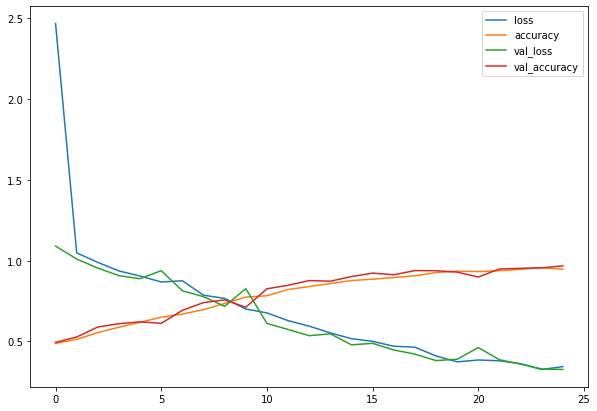

In [23]:
#plotting loss vs vall loss and accuracy vs val accuracy 
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [24]:
# model results
preds = model.predict(X_test)
print(preds.shape)
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=directories))

40/40 [==============================] - 2s 46ms/step
(1279, 4)
(1279,)
(1279, 4)
                    precision    recall  f1-score   support

     Mild_Demented       0.98      0.95      0.96       178
 Moderate_Demented       1.00      1.00      1.00        10
      Non_Demented       0.98      0.96      0.97       632
Very_Mild_Demented       0.95      0.98      0.96       459

          accuracy                           0.97      1279
         macro avg       0.98      0.97      0.97      1279
      weighted avg       0.97      0.97      0.97      1279



In [25]:
save_model(model,'my_modelNewData3.hdf5')

In [26]:
predictions = model.predict(X_test[:1])

1/1 [==============================] - 0s 17ms/step


In [27]:
print("prediction shape:", predictions.shape)

prediction shape: (1, 4)


In [28]:
def visualize(direction):
    list_dir=os.listdir(direction)
    plt.figure(figsize=(14,8))
    for i in range(1,7):
        plt.subplot(2,3,i)
        img= plt.imread(os.path.join(direction,list_dir[i]))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
    plt.tight_layout()

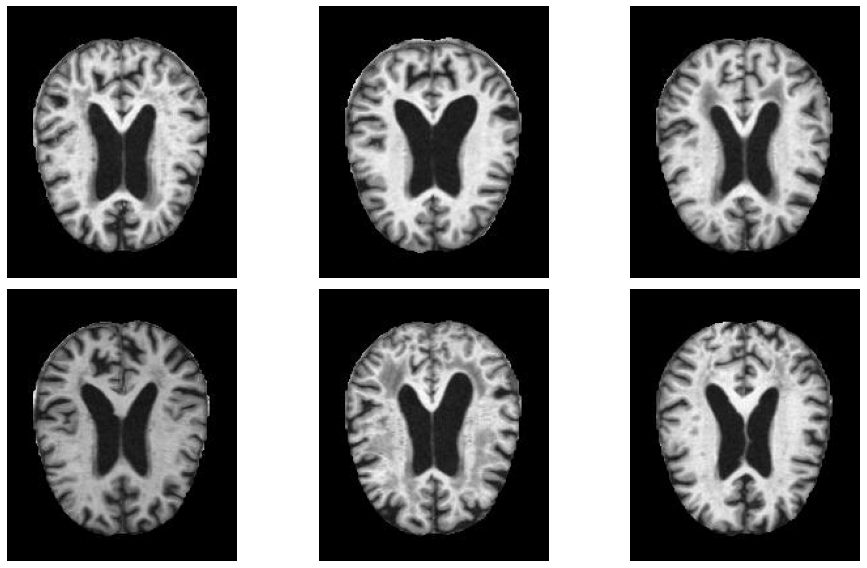

In [29]:
MildDemented_dir= 'C:/Users/aaron/OneDrive/Documents/Alzheimer_s Dataset/test/MildDemented'
visualize(MildDemented_dir)

In [30]:
predictions=model.predict(X_test)
print(predictions)
np.array(predictions)

40/40 [==============================] - 2s 45ms/step
[[4.6041142e-04 1.0254238e-04 8.7547189e-05 9.9934942e-01]
 [8.9965510e-01 1.4507315e-03 9.7708128e-02 1.1860749e-03]
 [3.7360103e-05 2.6638054e-05 9.8459595e-01 1.5340074e-02]
 ...
 [3.4385657e-08 6.8893314e-08 1.5867709e-03 9.9841309e-01]
 [5.8661815e-04 1.8519919e-03 4.3927912e-02 9.5363343e-01]
 [2.6514363e-03 2.6134581e-03 9.5978719e-01 3.4947880e-02]]


array([[4.6041142e-04, 1.0254238e-04, 8.7547189e-05, 9.9934942e-01],
       [8.9965510e-01, 1.4507315e-03, 9.7708128e-02, 1.1860749e-03],
       [3.7360103e-05, 2.6638054e-05, 9.8459595e-01, 1.5340074e-02],
       ...,
       [3.4385657e-08, 6.8893314e-08, 1.5867709e-03, 9.9841309e-01],
       [5.8661815e-04, 1.8519919e-03, 4.3927912e-02, 9.5363343e-01],
       [2.6514363e-03, 2.6134581e-03, 9.5978719e-01, 3.4947880e-02]],
      dtype=float32)

40/40 [==============================] - 2s 45ms/step


NameError: name 'label_to_class' is not defined

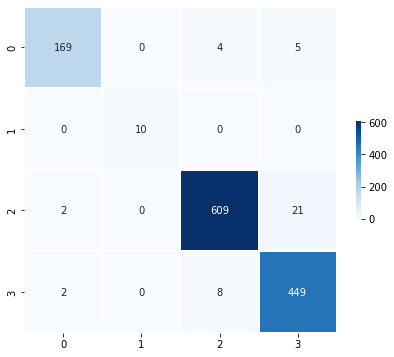

In [31]:
## plot confusion matrix
y_preds = model.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
y_trues = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_trues, y_preds)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

ax.set(
    xticklabels=list(label_to_class.keys()),
    yticklabels=list(label_to_class.keys()),
    
    ylabel='True label',tle='confusion matrix',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()